Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


Saving Screenshot 2025-04-26 133900.png to Screenshot 2025-04-26 133900.png

Original Image:


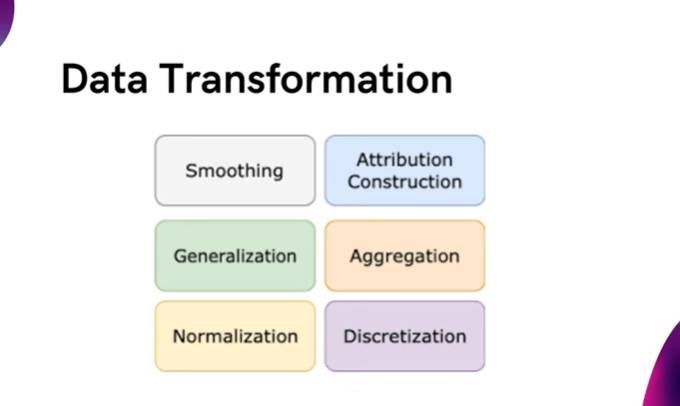


Image with Text Detection Regions:


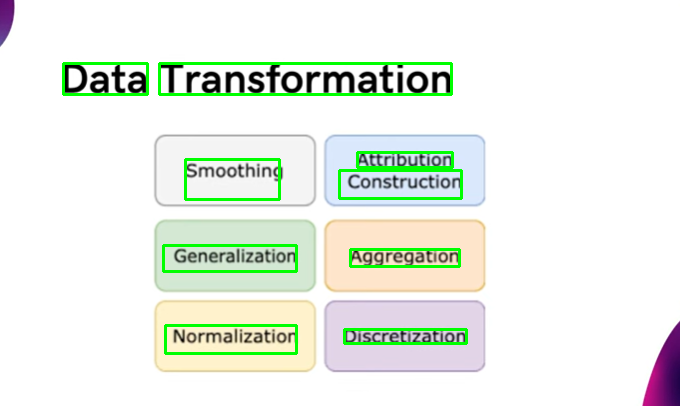


Detected Text:
Data Transformation

. Attribution
Smoothing Construction
Generalization Aggregation

Normalization Discretization



In [3]:
# Install necessary libraries
!apt-get install -y tesseract-ocr
!pip install pytesseract opencv-python

import cv2
import numpy as np
import pytesseract
from google.colab.patches import cv2_imshow
from google.colab import files

def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh

def draw_bounding_boxes(image, boxes):
    for (x, y, w, h) in boxes:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    return image

def detect_text_regions(preprocessed_img):
    boxes = []
    details = pytesseract.image_to_data(preprocessed_img, output_type=pytesseract.Output.DICT)
    for i in range(len(details['level'])):
        if int(details['conf'][i]) > 30:  # Confidence threshold
            (x, y, w, h) = (details['left'][i], details['top'][i], details['width'][i], details['height'][i])
            boxes.append((x, y, w, h))
    return boxes

def get_detected_text(image):
    text = pytesseract.image_to_string(image)
    return text

# Upload test image or use Drive
uploaded = files.upload()
image_path = list(uploaded.keys())[0] # Access the first element of the list
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Unable to read the image file: {image_path}")
else:
    print("\nOriginal Image:")
    cv2_imshow(image)
    preprocessed = preprocess_image(image)
    boxes = detect_text_regions(preprocessed)
    image_with_boxes = draw_bounding_boxes(image.copy(), boxes)
    print("\nImage with Text Detection Regions:")
    cv2_imshow(image_with_boxes)
    detected_text = get_detected_text(preprocessed)
    print("\nDetected Text:")
    print(detected_text)